In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from IPython.display import display

In [9]:
data=pd.read_csv('data04/train.csv/train.csv',chunksize=100000)
data=pd.concat(data,ignore_index=True)
display(data.head())

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


가만보니까 이거 저번 데이터랑 똑같다.

In [62]:
neg_data=data[data.amount<0]

In [ ]:
# neg_data.groupby(['store_id'])['amount'].count().sort_values(ascending=False)
# 확실히 마이너스 위로 해서 같은 카드로 환불이 있다.
# 환불 store_id 에 어떤 정보도 있지 않는다.
# 환불에 대해서 알아보기로 했다.
neg_data[neg_data.store_id==161][:10]

In [45]:
data['Date']=pd.to_datetime(data['date']+' '+data['time'],format='%Y-%m-%d %H:%M:%S')

In [55]:
data['hour']=data['Date'].dt.day

In [58]:
def hours(date):
    '''
    1 : 새벽
    2 : 아침
    3 : 점심
    4 : 저녁
    5 : 밤
    '''
    if date==24 or date<7:
        return 1
    elif 7<=date<11:
        return 2
    elif 11<=date<15:
        return 3
    elif 15<=date<19:
        return 4
    else:
        return 5

data['hour_band']=data['hour'].apply(hours)

In [97]:
data['wday/hours(norm)']=data['wday/hours'].map(data['wday/hours'].value_counts(normalize=True)*1000)

In [76]:
data['wday/hours']=data['days_of_week'].apply(str)+'#'+data['hour_band'].apply(str)
data['wday/hours(norm)']=data['wday/hours'].map(data['wday/hours'].value_counts(normalize=True)*1000)

In [98]:
neg_data=data[data.amount<0]

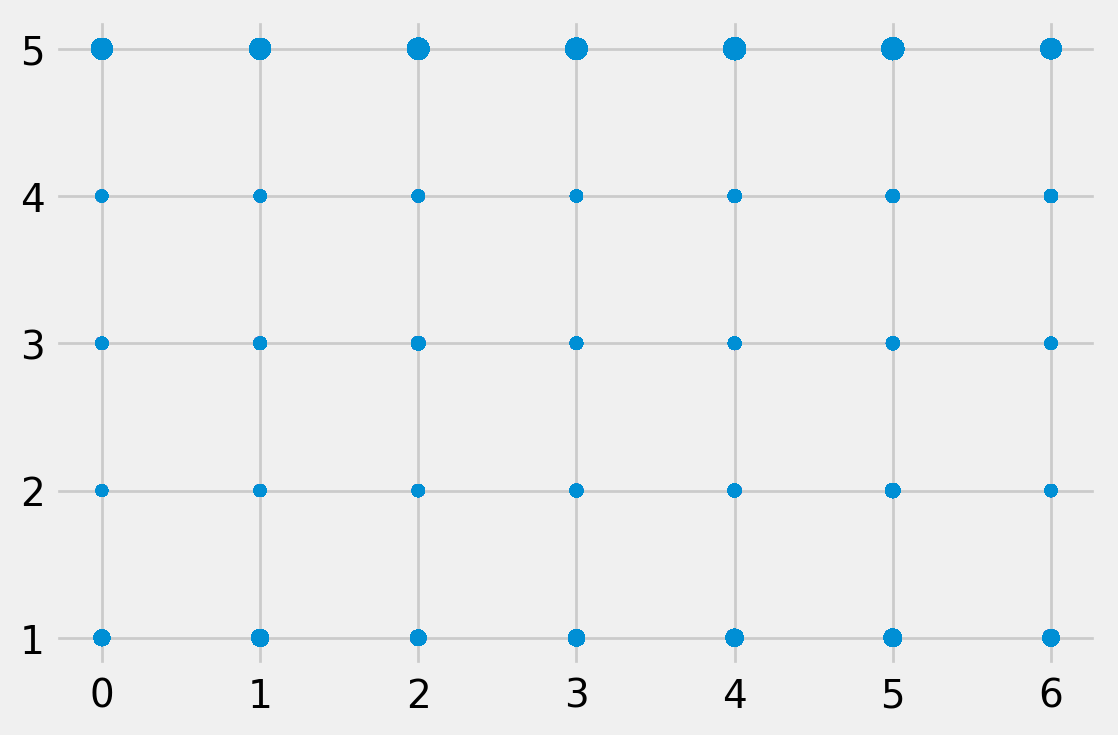

In [99]:
# 오히려 아침, 아예 밤에 환불이 많았다. 
# 161번은.
fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)

store=neg_data[neg_data.store_id==161][['days_of_week','hour_band','wday/hours(norm)']]

ax.scatter(store['days_of_week'],store['hour_band'],s=store['wday/hours(norm)'])

plt.show()